In [1]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows

features = pd.DataFrame(pd.read_csv('feature.csv'))

print(features.shape)
features.head()

(9144, 81)


,Classes,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6,Dimension 7,Dimension 8,Dimension 9,...,Dimension 71,Dimension 72,Dimension 73,Dimension 74,Dimension 75,Dimension 76,Dimension 77,Dimension 78,Dimension 79,Dimension 80
0,binocular,1,1,1,2,2,2,4,4,2,...,1,2,2,3,3,1,1,1,1,2
1,chair,2,2,1,0,3,0,4,2,2,...,1,4,3,3,5,2,2,1,0,4
2,tick,5,1,6,2,6,3,2,7,1,...,3,4,7,0,6,3,2,7,3,6
3,minaret,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,1
4,Faces,1,6,4,2,2,0,6,6,5,...,6,2,6,3,3,6,1,2,5,6


In [2]:
new_data = features[features['Classes']=='chair'][0:5]
type(new_data)

pandas.core.frame.DataFrame

In [3]:
unique_class = features['Classes'].unique()
number_unique = 10
subData = pd.DataFrame()
for i,val in enumerate(unique_class):
    new_data = features[features['Classes']==val][0:number_unique]
    subData = pd.concat([new_data,subData], ignore_index=True)
subData.head()

,Classes,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6,Dimension 7,Dimension 8,Dimension 9,...,Dimension 71,Dimension 72,Dimension 73,Dimension 74,Dimension 75,Dimension 76,Dimension 77,Dimension 78,Dimension 79,Dimension 80
0,gerenuk,0,5,5,6,0,1,3,3,5,...,2,4,6,6,6,2,3,6,6,6
1,gerenuk,2,1,5,5,7,3,1,6,6,...,3,4,6,5,6,2,3,6,3,7
2,gerenuk,2,2,5,6,6,5,2,4,4,...,3,2,5,3,7,3,3,4,5,6
3,gerenuk,4,2,4,4,7,3,2,6,3,...,2,3,6,3,7,4,1,2,2,4
4,gerenuk,1,4,3,3,6,3,4,5,6,...,2,3,4,7,6,1,4,3,6,7


In [4]:
# Use numpy to convert to arrays
import numpy as np
# Classes are the values we want to predict
classes = np.array(features['Classes'])
# Remove the classes from the features
# axis 1 refers to the columns
features= features.drop('Classes', axis = 1)
# Convert to numpy array
features = np.array(features)
print('lables:',classes)
print('features:',features)

#Creating Subset for hyperparameter
subdata_classes = np.array(subData['Classes'])
subData= subData.drop('Classes', axis = 1)
subData = np.array(subData)
print('lables:',subdata_classes)
print('features:',subData)

lables: ['binocular' 'chair' 'tick' ... 'Faces' 'grand_piano' 'Motorbikes']
features: [[1 1 1 ... 1 1 2]
 [2 2 1 ... 1 0 4]
 [5 1 6 ... 7 3 6]
 ...
 [3 3 2 ... 4 4 4]
 [0 0 0 ... 0 0 0]
 [5 3 0 ... 3 5 1]]
lables: ['gerenuk' 'gerenuk' 'gerenuk' ... 'binocular' 'binocular' 'binocular']
features: [[0 5 5 ... 6 6 6]
 [2 1 5 ... 6 3 7]
 [2 2 5 ... 4 5 6]
 ...
 [1 0 3 ... 7 6 4]
 [2 0 0 ... 0 0 1]
 [0 1 2 ... 2 3 4]]


In [5]:
# from sklearn import preprocessing
# #Main data
# le = preprocessing.LabelEncoder()
# labels = le.fit_transform(classes)
# labels[labels == 0] =101
# print('labels',labels)

# #Sub data
# subdata_labels = le.fit_transform(subdata_classes)
# subdata_labels[subdata_labels == 0] =101
# print('labels',subdata_labels)

In [6]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, classes, test_size = 0.2, random_state = 42)
#Subset
subdata_train_features, subdata_test_features, subdata_train_labels, subdata_test_labels = train_test_split(subData, subdata_classes, test_size = 0.2, random_state = 42)

In [7]:
#Maindata
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

#Subdata
print('Training Features Shape:', subdata_train_features.shape)
print('Training Labels Shape:', subdata_train_labels.shape)
print('Testing Features Shape:', subdata_test_features.shape)
print('Testing Labels Shape:', subdata_test_labels.shape)

Training Features Shape: (7315, 80)
Training Labels Shape: (7315,)
Testing Features Shape: (1829, 80)
Testing Labels Shape: (1829,)
Training Features Shape: (808, 80)
Training Labels Shape: (808,)
Testing Features Shape: (202, 80)
Testing Labels Shape: (202,)


In [8]:
# Import the model we are using
# Instantiate model with 100 decision trees
# Train the model on training data
# Use the forest's predict method on the test data
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf=RandomForestClassifier(n_estimators=410,random_state = 42)
clf.fit(train_features,train_labels)
y_pred_test=clf.predict(test_features)
y_pred_train = clf.predict(train_features)

In [9]:
from sklearn import metrics
print ("Accuracy on Training data",metrics.accuracy_score(train_labels, y_pred_train)*100)
print("Accuracy on Test data:",round(metrics.accuracy_score(test_labels, y_pred_test),2)*100)

Accuracy on Training data 100.0
Accuracy on Test data: 51.0


In [10]:
#Modeleling on Subdata with no hyper 
clf=RandomForestClassifier(n_estimators=1200,random_state = 42)
clf.fit(subdata_train_features,subdata_train_labels)
y_pred_test_sub=clf.predict(subdata_test_features)

In [11]:
print("Accuracy on Test data:",round(metrics.accuracy_score(subdata_test_labels, y_pred_test_sub),2)*100)

Accuracy on Test data: 27.0


In [27]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = range(500,5000,50)
# Maximum number of levels in tree
max_depth = [90, 100, 110, 120]
# Minimum number of samples required to split a node
min_samples_split = [8, 10, 12]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': range(500, 5000, 50), 'max_depth': [90, 100, 110, 120], 'min_samples_split': [8, 10, 12], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [28]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(subdata_train_features,subdata_train_labels)
y_pred_randomSearch_test=clf_random.predict(subdata_test_features)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [29]:
print('Best params: ', clf_random.best_params_)
print("Accuracy on Test data: ",clf_random.best_score_*100)

Best params:  {'n_estimators': 4300, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_depth': 90, 'bootstrap': True}
Accuracy on Test data:  26.36837665823173


In [16]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [3, 5, 10],
    'max_features': [1, 3,5,7],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [100, 200,300]
}
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, scoring='accuracy')
grid_search.fit(subdata_train_features,subdata_train_labels)

y_pred_randomSearch_test=clf_random.predict(subdata_test_features)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


In [30]:
print('Best params are ',str(grid_search.best_params_))
print("Accuracy is:", str(grid_search.best_score_*100))

Best params are  {'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 300}
Accuracy is: 26.12146307798482


In [12]:
clf=RandomForestClassifier(n_estimators=410,max_depth=30,max_features=10,
                           min_samples_leaf=1,min_samples_split=3
                           ,criterion='entropy',bootstrap=False,random_state = 42)
clf.fit(train_features,train_labels)
y_pred=clf.predict(test_features)

In [13]:
print('Accuracy with hyper-parameter is ', round(metrics.accuracy_score(test_labels,y_pred),2)*100)

Accuracy with hyper-parameter is  52.0


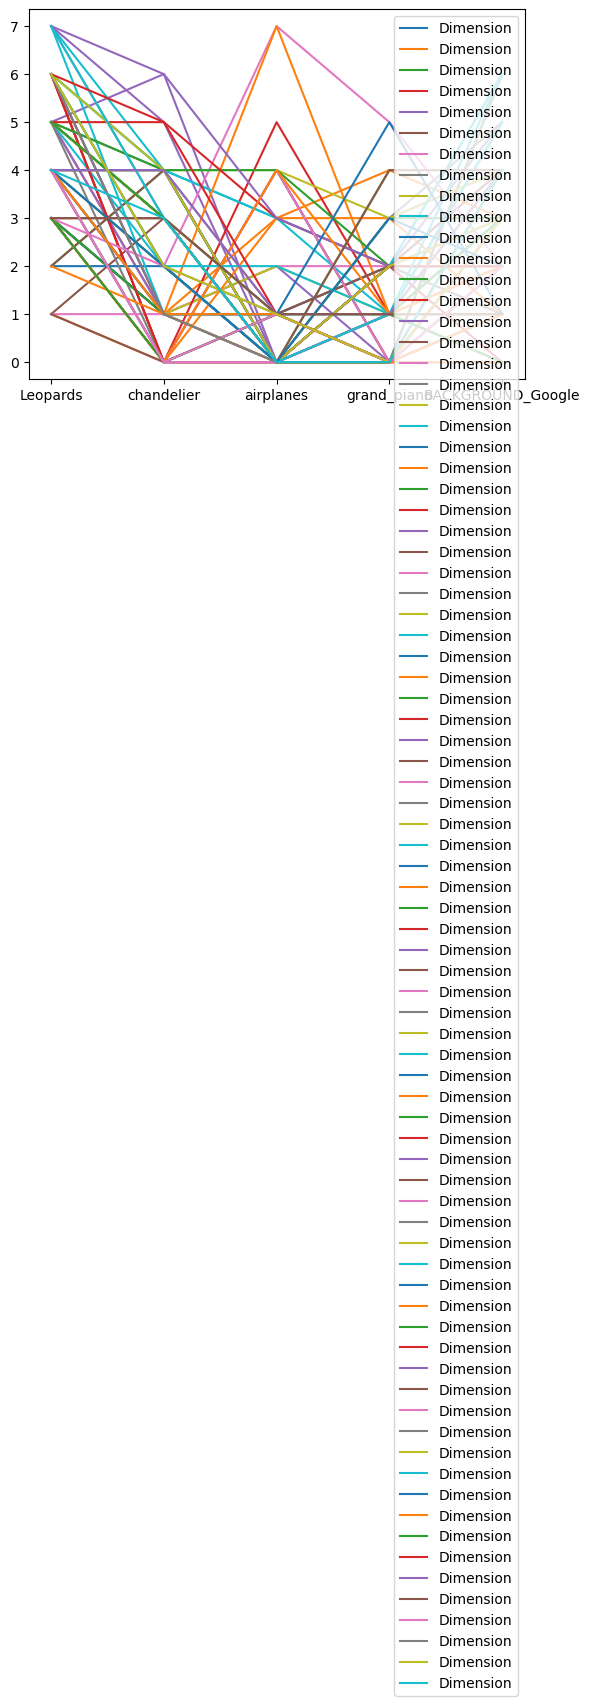

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(y_pred[0:5], test_features[0:5], label="Dimension")

ax.legend()
plt.show()